These are my notes on Lagrangian mechanics, including some example simulations of simple physical systems.

## Prerequisites

I'm not going to say that you absolutely need to know a particular set of topics before going into this. But it would certainly make things easier if you know these:

* Some basic calculus. Do you know what the difference between a partial derivative and a total derivative is? Do you know what $\int_{a}^{b} \frac{d^2 x}{d t^2} dt $ means?

* Some basic physics. Do you know  what $F = ma$ means? Do you know what an inertial reference frame is?

* Dimensional analysis. Do you know that force is given in units of ${mass} \cdot {length} \:/\: {time}^{2}$ ? Do you know that energy is ${mass} \cdot {length}^2 \:/\: {time}^{2}$ ?

* Python. Do you know what `a = [x for x in y if x > 0]` means?

## Resources

Basically all of the physics concepts we'll use here are explained in more detail in the first volume of Leonard Susskind's book [The Theoretical Minimum](https://en.wikipedia.org/wiki/The_Theoretical_Minimum). Also check out his free [Classical Mechanics](https://www.youtube.com/watch?v=ApUFtLCrU90&list=PL47F408D36D4CF129) lecture series which covers the same content as the book.

# Force-based Physics

In this section I'll describe a very common way of approaching physics simulations, which you are probably familiar with. But we won't be using this approach exactly. I just bring it up to explain why we'll use a different approach.

It's very common to start physics problems by first writing down equations to describe all the forces acting on each object. For each object, you sum up all the forces acting on it to get the total force on that object, $ \textbf{F}(t, \{\textbf{x}\}, \{\dot{\textbf{x}}\}) $, where $t$ is time, $\{\textbf{x}\}$ is the set of positions of all objects, and $\{\dot{\textbf{x}}\}$ is the set of velocities of all objects. Then you use Newton's equation of motion $\textbf{F} = m \textbf{a} = m \frac{d^2 \textbf{x}}{d t^2} = m \ddot{\textbf{x}}$ to get an equation that describes the acceleration of the particle, parameterized by the particle's mass $m$ and the state of the system, $t$, $\{\textbf{x}\}$, $\{\dot{\textbf{x}}\}$.

At the end, you get a full set of second order differential equations that describes the motion of all the objects in the system. You can choose an initial condition $t_0$, $\{\textbf{x}(t_0)\}$, $\{\dot{\textbf{x}}(t_0)\}$ and then integrate forward in time using one of many different methods.

This force-based approach works for a lot of problems. But it doesn't generalize to other kinds of physics problems. By itself, it doesn't account for things like the electromagnetic field, rotating objects, or relativity theory. You have to add in other ideas to account for those.

There is also the issue of numerical accuracy. If our method of integration introduces a lot of error over time, how do we detect that? One reliable way is to calculate the total energy of the system at each step and make sure that it remains relatively constant. Or if the energy is expected to change over time, check that it changes in the expected way. But how do we even know what to expect the energy to be?

There is a more general approach to physics which applies to all known physical systems. It can actually be simpler to think about than the force-based approach, once you get the hang of it. It's an energy-based approach. So instead of starting with equations of force and deriving the equations of motion from those, we will instead derive the equations of motion from equations of energy.

# Energy

In classical non-relativistic physics, there are equations for the kinetic energy and the potential energy for each object in the system.

### Kinetic Energy


Kinetic energy $T$ is purely based on an object's mass and velocity:

$$ T = \frac{1}{2} m \dot{\textbf{x}}^2 $$

If the object is not moving in a particular frame of reference, it has zero kenetic energy in that frame. The faster the object is moving, in any direction, the more kinetic energy it has. In two different frames, the same object will have a different amount of kinetic energy, as long as the speed $|\dot{\textbf{x}}|$ of the object is different in the two frames.

### Potential Energy

Next is potential energy $V(\textbf{x}, t)$ which can depend on the position of the object and on time. So there can be a different number at each point in time and space.

Potential energy is more complicated than kinetic. That's because the form of the kinetic energy equation can be different for different kinds of interactions that do work on an object.

For instance, an object attached to a spring has a different potential energy equation than a planet in the solar system.

But there is a relationship between the force on an object and the potential energy:

$$ F^i = -\frac{\partial V(\textbf{x}, t)}{\partial x^i} $$

$F^i$ is the component of the force on the object in the $i$-th dimension. $i$ here is just an index into the vector $\textbf{F}$, it is not an exponent. $i$ runs from 1 to N, for each spatial dimension. $x^i$ is just the $i$-th dimension component of the position vector $\textbf{x}$.

We can also write this as a vector equation without indices:

$$ \textbf{F} = -\nabla V(\textbf{x}, t)$$

Notice that the relationship between the potential and the force only involves partial derivatives of $V$ with respect to spatial coordinates. That means that if there is a term in $V$ that depends only on time, it won't show up in the force equation and thus won't affect the motion.

For now, I'll simplify the force equation to a case where there's only motion in one dimension and the potential doesn't change over time. We'll use $x$ (not bolded and without an index) to be the position in just one dimension--the $x$-dimension.

$$ F = - \frac{d V(x)}{d x} $$

In plain English, the force is the negative slope of the potential energy function. So the force points towards the direction in which the potential energy instantaneously decreases, like a ball rolling down a hill.

Let's see a visual example of this.

We'll choose the potential energy to be $V(x) = \frac{1}{2} k x^2$. $k$ is a constant that sets the scale of the potential. The force equation is $F = -\frac{d}{dx} (\frac{1}{2} k x^2) = -kx$. Let's make a diagram showing this potential energy function and draw arrows in a few places indicating the strength and direction of the force. We'll set $k=1$.

(The code here isn't very important. Skip it unless you want to read it.)

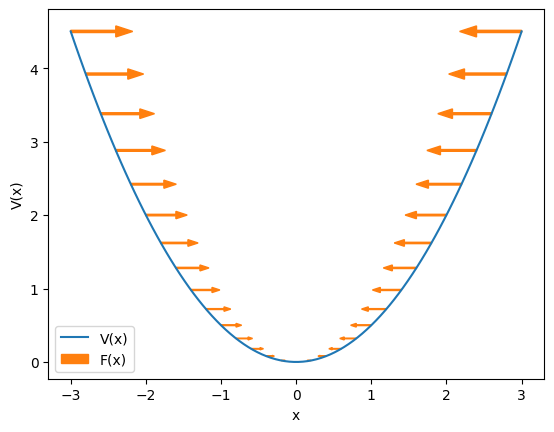

In [1]:
import matplotlib.pyplot as plt
import numpy as np

k = 1

def V(x):
    return 0.5 * k * x**2

def F(x):
    return -k * x

x_list = np.linspace(-3, 3, 100)
V_list = V(x_list)

plt.plot(x_list, V_list, label='V(x)')

for idx, x in enumerate(np.linspace(-3, 3, 31)):
    Fx = F(x)
    Vx = V(x)
    plt.arrow(
        x, Vx, 0.2*Fx, 0,
        width=0.01*abs(Fx),
        head_width=0.05*abs(Fx),
        label=None if idx!=0 else 'F(x)',
        color='tab:orange')

plt.xlabel('x')
plt.ylabel('V(x)')
plt.legend()

The arrows indicate the magnitude and direction of the force at the $x$ value where its tail is located. The size of an arrow corresponds to the magnitude of the force.

The equation of motion is $F = m \ddot{x}$. Solving for acceleration, we get $\ddot{x} = \frac{F}{m}$, so the acceleration is directly proportional to the force.

Let's think about how an object in this potential will act. We'll solve it more rigorously later, but for now I just want to try to show how we can think about this intuitively.

If we placed the object at, say $x=-2$, with velocity $\dot{x}=0$, it will be forced toward the right--since $V(x)$ slopes downward to the right at $x=-2$, the force is toward the right. As the object starts to gain velocity towards the right, it will start to move in that direction. The magnitude of the slope of $V(x)$ will start to decrease as $x$ increases, which will decrease the amount of force on the object. When it reaches $x=0$ the force is 0. The object will continue to move to the right from there, and the force will start to increase again, but in the opposite direction, slowing the object down. So the object was at its maximum speed at $x=0$. Since $V(x)$ is symmetrical around $x=0$, the object will continue to slow down until it stops at $x=2$, and the process continues in the reverse direction. The object bounces back and forth forever.

Hopefully it's not too difficult for you to see this. But if it is, don't worry, we'll come back to this example.

# The Stationary Action Principle

The stationary action principle is one of the most general known principles of physics. It's true for all systems in nature. So if we want to be able to simulate any given system in nature, I think it makes sense to start here.

In case this section doesn't make much sense to you, don't worry. Just read it and then move on. You shouldn't need to understand it at a deep level, I'm just giving you some important context for what we'll talk about next--deriving equations of motion. You can always go read more about stationary action elsewhere if you really want to understand it.

Before I say what the stationary action principle is exactly, I need to give you some definitions.

The idea is centered around a term $L$, which is a quantity in units of energy that can depend on time and the state of the system. $L$ is known as the Lagrangian of the system. Where does $L$ come from? We'll get to that. If we integrate $L$ between two points in time, we get a quantity known as the action $A$ of the system between those two points. We can write that as:

$$ A = \int_{a}^{b} Ldt $$

The entire positional state of a system can be written as a vector $\textbf{q}$. An individual element of this is $q^i$. $\textbf{q}$ has as many elements as there are degrees of freedom in the system. For instance, if we have four particles in a 3-dimensional space, there are twelve degrees of freedom and $\textbf{q}$ has twelve elements. The reason we use $q$ instead of $x$ here is because it can be any kind of positional coordinate, not just a Cartesian coordinate. It could be a polar coordinate if we want. $\textbf{q}$ could contain a mixture of different types of coordinates. Later I'll show examples of this.

There is also the state of the velocities in the system, which we call $\frac{d \textbf{q}}{d t}$ or $\dot{\textbf{q}}$.

$\textbf{q}$ and $\dot{\textbf{q}}$ can be expressed as equations that only depend on time, $\textbf{q}(t)$ and $\dot{\textbf{q}}(t)$. $\textbf{q}(t)$ is the trajectory or "path" that the system takes over time. 

So we can write $L$ with all its possible explicit dependencies as $L(\textbf{q}(t), \dot{\textbf{q}}(t), t)$. The action integral with all these explicit dependencies is:

$$ A = \int_{a}^{b} L(\textbf{q}(t), \dot{\textbf{q}}(t), t)dt $$

Now imagine that we know the state $\textbf{q}$ and $\dot{\textbf{q}}$ of a system at two different times $t_a$ and $t_b$, and we know what $L$ is for the system. We want to somehow calculate the trajectory $\textbf{q}(t)$ that the system took between those two points.

There are an infinite number of different trajectories that we could draw between the initial and final state. The stationary action principle says that the trajectory that the system actually takes is the one that makes the action stationary.

What does it mean for the action to be stationary? It means that compared to all the other possible paths, the one that the system actually takes will either minimize or maximize the action $A$. (To be completely correct, we should also say that it could be a saddle point, not just a minimum or maximum.)


The stationary action principle can be written as:

$$ \delta A = \delta \int_{a}^{b} L(\textbf{q}(t), \dot{\textbf{q}}(t), t)dt = 0 $$

This just means that, given the correct trajectory $\textbf{q}(t)$, if we add some tiny change $\delta\textbf{q}(t)$ to the trajectory, the action will not change--because it is at a maximum, minimum, or saddle point. The change in action is $\delta A$.

Another way to state the stationary action principle is that given the trajectory of any physical system, there exists some equation for a quantity $L$ which makes the action stationary.

Just one last note for this section. How do we know what the Lagrangian $L$ is for a particular system? It fundamentally comes from experimentation, just like how force equations come from experimentation. For example, a scientist could measure the trajectory of a certain kind of system and then try to find some equation for $L$ that satisfies $\delta A = 0$. If she thinks she found the right one, she can try to use it to predict what will happen in the future. If the predictions are right, that gives more evidence that the equation for $L$ is right.

# Euler-Lagrange equations of motion

Given a particular Lagrangian, how do we find the trajectory that makes the action stationary? We use what are called the Euler-Lagrange equations of motion. I'll call these the E-L equations for now on. The E-L equations are:

$$ \frac{d}{dt}\frac{\partial L(\textbf{q}, \dot{\textbf{q}}, t)}{\partial \dot{q}^i} = \frac{\partial L(\textbf{q}, \dot{\textbf{q}}, t)}{\partial q^i} $$

Or more concisely:

$$ \frac{d}{dt}\frac{\partial L}{\partial \dot{q}^i} = \frac{\partial L}{\partial q^i} $$

Remember that $q^i$ is the $i$-th component of $\textbf{q}$, and $\dot{q}^i$ is the $i$-th component of $\dot{\textbf{q}}$. So each degree of freedom in the system has its own equation of motion.

Given a Lagrangian for a system, you just use the above formula to find the equations of motion. They'll be second-order equations and you can use some method of integration to simulate the system.

Notice that the E-L equations involve partial derivatives of $L$ with respect to spatial coordinates and velocities. If we had some Lagrangian of the form $L = L_0 + f(t)$, where $f(t)$ depends only on time, then $f(t)$ won't show up at all in the equations of motion.

# Classical Lagrangian

Let's finally start looking at Lagrangians for specific types of systems. In classical non-relativistic physics, a single point mass in a potential is described by the Lagrangian:

$$ L = T - V(\textbf{x}, t) $$

This means that if we wanted to calculate the action over a section of the particle's trajectory, we integrate the difference between kinetic and potential energy over time.

If we have multiple particles, we have to add terms for each of their kinetic energies, and the potential can depend on the positions of all particles:

$$ L = \sum_i{T_i} - V(\{\textbf{x}\}, t) $$

Again, I want to stress that this comes from experimentation, so it's not like this should be obvious to you.

### Example: Harmonic Oscillator

Let's revisit the example from earlier of a particle in one dimension with $V(x) = \frac{1}{2}kx^2$. Also, as I mentioned earlier, kinetic energy is $T=\frac{1}{2}m \dot{x}^2$. This gives:

$$ L = \frac{1}{2}m \dot{x}^2 - \frac{1}{2}kx^2 $$

There's going to be just one E-L equation, since we only have one degree of freedom. So we can drop the index $i$ from the E-L equation. Also, $x$ is the positional coordinate, so we'll use $q = x$. That gives us the E-L equation:

$$ \frac{d}{dt}\frac{\partial L}{\partial \dot{x}} = \frac{\partial L}{\partial x} $$

Now let's plug in $L$ and simplify. First, the left side of the E-L equation.

$$\frac{\partial L}{\partial \dot{x}} = \frac{\partial}{\partial \dot{x}}(\frac{1}{2}m \dot{x}^2 - \frac{1}{2}kx^2) = m \dot{x}$$

$$\frac{d}{dt}\frac{\partial L}{\partial \dot{x}} = m\ddot{x}$$

Next, the right side.

$$ \frac{\partial L}{\partial x} = \frac{\partial}{\partial x}(\frac{1}{2}m \dot{x}^2 - \frac{1}{2}kx^2) = -kx $$

Putting them together, we have the equation of motion:

$$m \ddot{x} = -kx$$
$$\ddot{x} = -\frac{k}{m}x $$

This is the same equation as what we obtained earlier by using $F=ma$ and $F=-\frac{\partial V(x)}{\partial x}$. So you could say that for this particular problem, it may have been overkill to use Lagrangian mechanics. But the point is that Lagrangian mechanics will work for a huge range of different kinds of systems.